In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_PV_production_curve(sunrise: int, peak: int, sunset: int, peak_power: int, time_horizon, peak_noise: float = 0.50, noise: float = 0.0) -> np.array:
    """
    Generate an hourly linearized PV prodction curve.

    :param sunrise: The time of sunrise in hours.
    :param peak: The time of peak production in hours.
    :param sunset: The time of sunset in hours.
    :param peak_power: The peak power of the PV system in W.
    :param time_horizon: The time horizon in hours.
    :peak_noise: The noise factor for the peak power. 0.50 means that the peak power each day can be between 50% and 150% of the given peak power.
    :noise: The noise factor for the production values. 0.50 means that the production values can be between 50% and 150% of the calculated values.
    :return: A list of PV production values in W.
    """

    production_curve = np.zeros(time_horizon)
    num_days = time_horizon // 24
    
    for day in range(num_days):
        peak_power_day = peak_power * np.random.uniform(1 - peak_noise, 1 + peak_noise)
        increasing_slope = peak_power_day / (peak - sunrise)
        decreasing_slope = -peak_power_day / (sunset - peak)
        for hour in range(sunrise, sunset):
            production_curve[day * 24 + hour] = min(increasing_slope * (hour - sunrise), peak_power_day + decreasing_slope * (hour - peak)) * np.random.uniform(1 - noise, 1 + noise)
    return production_curve

In [62]:
def generate_PV_production_curve_sinusoidal(sunrise: int, sunset: int, peak_power: float, time_horizon: int, peak_noise: float = 0.50, noise: float = 0.0) -> np.array:
    """
    Generate a sinusoidal PV production curve.

    :param sunrise: The hour of sunrise in the day.
    :param sunset: The hour of the sunset in the day.
    :param peak_power: The peak power of the PV system in W.
    :param time_horizon: The time horizon in hours.
    :peak_noise: The noise factor for the peak power. 0.50 means that the peak power each day can be between 50% and 150% of the given peak power.
    :noise: The noise factor for the production values. 0.50 means that the production values can be between 50% and 150% of the calculated values.
    :return: A np.array of PV production values in W.
    """

    production_curve = np.zeros(time_horizon)
    num_days = time_horizon // 24
    active_hours = sunset - sunrise
    positive_sine = np.sin(np.pi * np.linspace(0, 1, active_hours))
    for day in range(num_days):
        peak_power_day = peak_power * np.random.uniform(1 - peak_noise, 1 + peak_noise)
        for hour in range(sunrise, sunset):
            production_curve[day * 24 + hour] = peak_power_day * positive_sine[hour - sunrise] * np.random.uniform(1 - noise, 1 + noise)
    return production_curve

In [63]:

sunrise = 8
peak = 13
sunset = 18
peak_power = 100
num_days = 3
time_horion = 24 * num_days
noise = 0.10
prod_curve = generate_PV_production_curve(sunrise, peak, sunset, peak_power, time_horion, noise=noise)

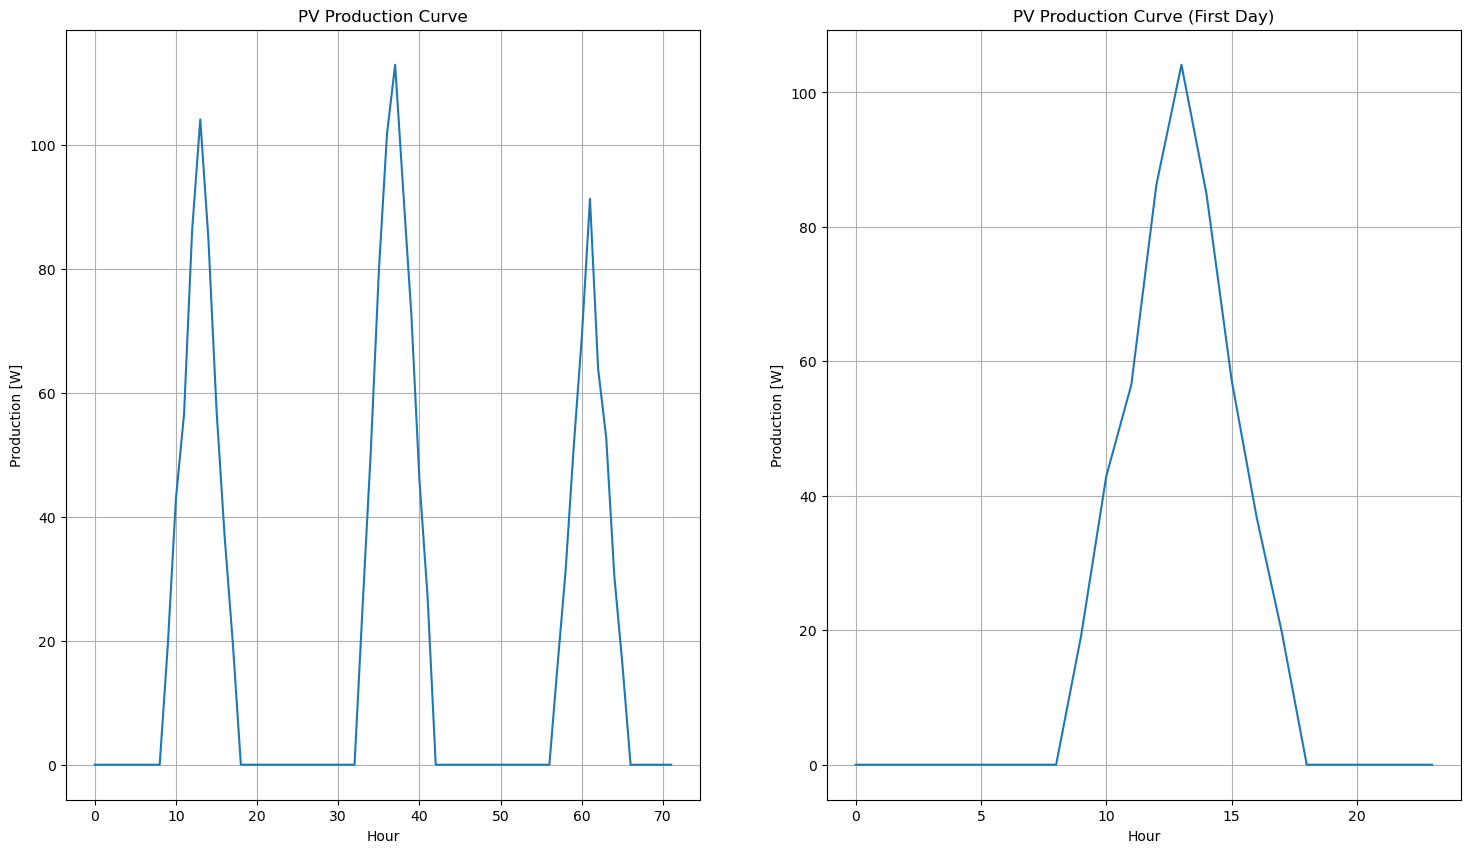

In [64]:
plt.figure(figsize=(18,10))
plt.subplot(1, 2, 1)
plt.plot(prod_curve)
plt.title("PV Production Curve")
plt.xlabel("Hour")
plt.ylabel("Production [W]")
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(prod_curve[:24])
plt.title("PV Production Curve (First Day)")
plt.xlabel("Hour")
plt.ylabel("Production [W]")
plt.grid()
plt.show()


In [71]:
prod_curve = generate_PV_production_curve_sinusoidal(sunrise, sunset, peak_power, time_horion, noise=0.0)


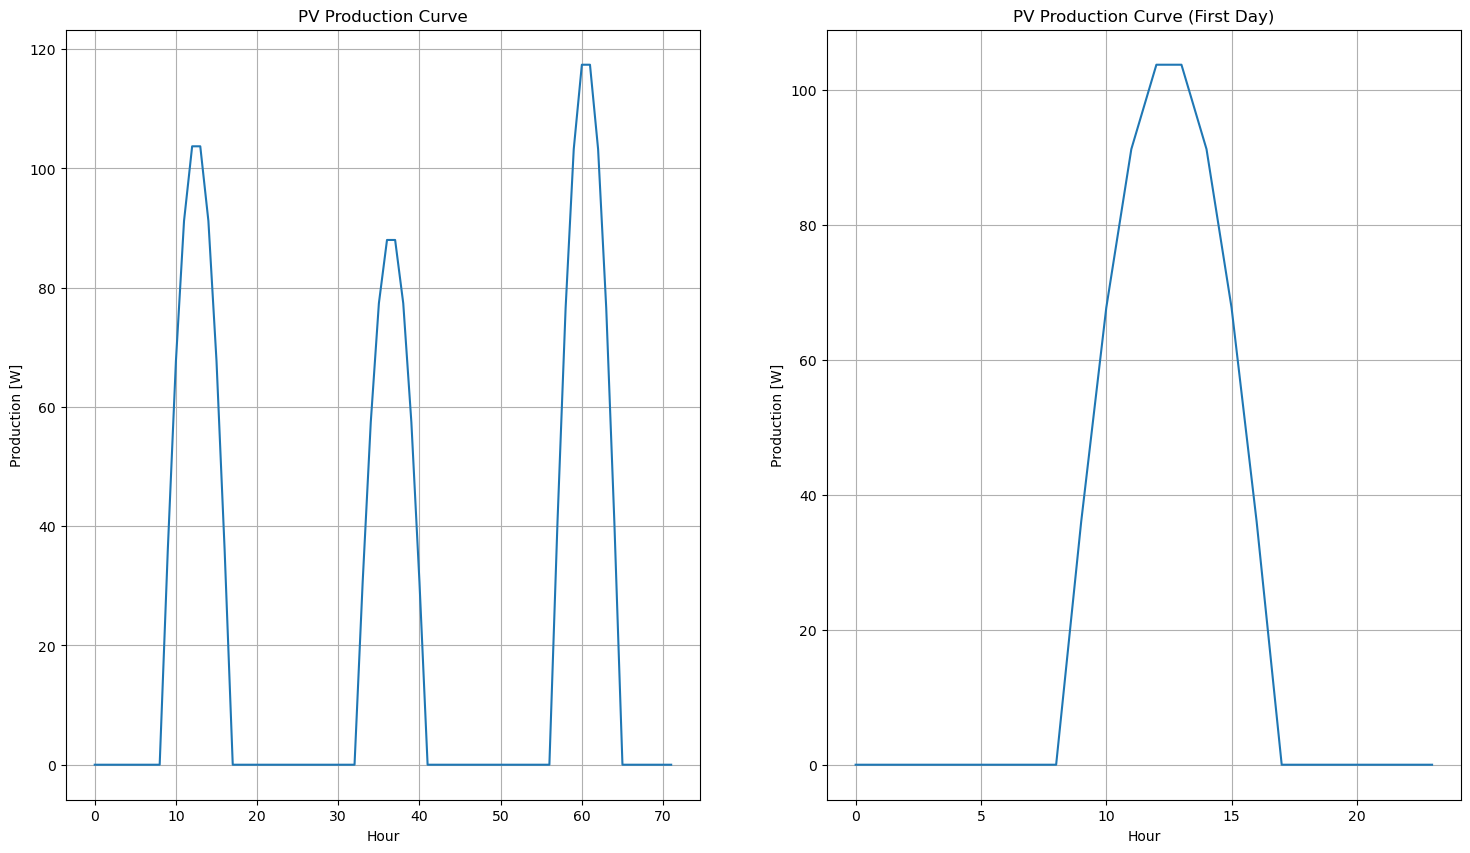

In [72]:
plt.figure(figsize=(18,10))
plt.subplot(1, 2, 1)
plt.plot(prod_curve)
plt.title("PV Production Curve")
plt.xlabel("Hour")
plt.ylabel("Production [W]")
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(prod_curve[:24])
plt.title("PV Production Curve (First Day)")
plt.xlabel("Hour")
plt.ylabel("Production [W]")
plt.grid()
plt.show()
